In [1]:
import pandas as pd
df= pd.read_csv(r"C:\Users\crama\Downloads\auto-mpg  - auto-mpg (1).csv")
df.head()

In [3]:
#1.	Drop column Origin from the dataset
df.drop("origin",axis = 1,inplace=True)
df.head()

In [ ]:
df.describe()

In [4]:
#2.	Find out all the missing values in the dataset and replace it with its most appropriate replacement
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [5]:
type(df['model year'].mode()[0])

numpy.float64

In [6]:
df['model year'].fillna(df['model year'].mode()[0], inplace = True)

In [7]:
df['model year'].isnull().sum()

0

In [8]:
df['acceleration'].fillna(df['acceleration'].median(), inplace=True)

In [9]:
df['acceleration'].isnull().sum()

0

In [10]:
df['CAR Number'].duplicated().sum()

8

In [11]:
df = df.drop_duplicates(subset=['CAR Number'])

In [12]:
df['CAR Number'].duplicated().sum()

0

In [13]:
df['CAR Number'].isnull().sum()

1

In [14]:
df[df['CAR Number'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN


In [15]:
df[df['car name']=='amc ambassador dpl']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [16]:
if df['horsepower'].max():
    print(df['car name'])

0        chevrolet chevelle malibu
1                buick skylark 320
2               plymouth satellite
3                    amc rebel sst
4                      ford torino
                  ...             
93        plymouth fury gran sedan
94    chrysler new yorker brougham
95        buick electra 225 custom
96         amc ambassador brougham
97                plymouth valiant
Name: car name, Length: 90, dtype: object


In [17]:
#Display the name of the car with maximum number of horsepower.
display(df[df.horsepower == df.horsepower.max()])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
8,14,8,455.0,225,4425,10.0,70.0,pontiac catalina,NMTL580
13,14,8,455.0,225,3086,10.0,70.0,buick estate wagon (sw),YUTN78
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53


In [18]:
df['L/100KM'] = df['mpg']*235.214583

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100KM
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043,4233.862494
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079,3528.218745
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600,4233.862494
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000,3763.433328
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET,3998.647911


In [22]:
df= df.drop('mpg',axis=1)

In [23]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100KM
0,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043,4233.862494
1,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079,3528.218745
2,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600,4233.862494
3,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000,3763.433328
4,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET,3998.647911


In [25]:
#6.	Normalize the column “Weight” so that the values range from 0 to 1 
df['weight'] = df['weight']/df['weight'].max()

In [26]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100KM
0,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,4233.862494
1,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,3528.218745
2,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,4233.862494
3,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,3763.433328
4,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,3998.647911


In [33]:
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        88,  46,  87,  90, 113, 210, 193, 100, 175, 153, 180, 110,  72,
        86,  70,  65,  60,  80,  54, 208, 155, 112,  76,  69,  92, 145,
       137, 158, 105], dtype=int64)

In [34]:
df['bin'] = pd.cut(df.horsepower,bins=3,labels=['Low','Mid','High'])
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100KM,bin
0,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,4233.862494,Mid
1,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,3528.218745,Mid
2,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,4233.862494,Mid
3,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,3763.433328,Mid
4,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,3998.647911,Mid


<AxesSubplot:ylabel='Frequency'>

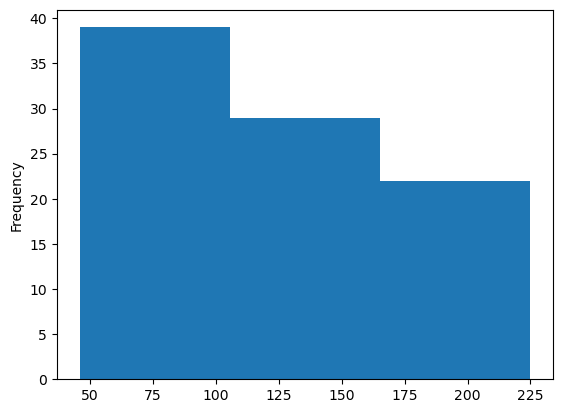

In [37]:
df['horsepower'].plot(kind='hist',bins=3)

<AxesSubplot:>

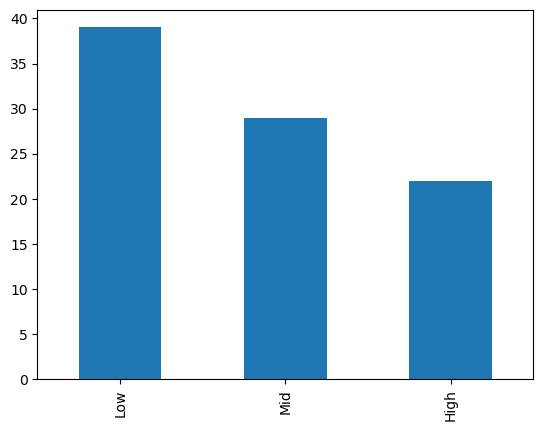

In [45]:
df['bin'].value_counts().plot(kind ='bar')

In [47]:
df['zscore'] = (df['horsepower']-df['horsepower'].mean())/df['horsepower'].std()

In [48]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100KM,bin,zscore
0,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,4233.862494,Mid,-0.051644
1,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,3528.218745,Mid,0.681137
2,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,4233.862494,Mid,0.367088
3,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,3763.433328,Mid,0.367088
4,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,3998.647911,Mid,0.157722


In [55]:
df['zscore'].describe()

count    9.000000e+01
mean    -1.110223e-17
std      1.000000e+00
min     -1.810317e+00
25%     -8.891071e-01
50%      1.577223e-01
75%      6.811370e-01
max      1.937332e+00
Name: zscore, dtype: float64

<AxesSubplot:>

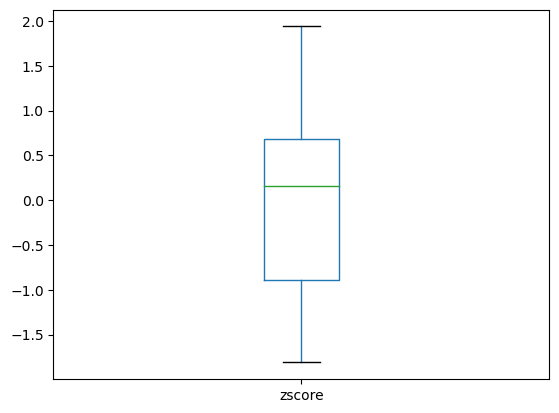

In [58]:
df['zscore'].plot(kind='box')